# Support Vector Regression (SVR)

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [0]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [0]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [0]:
y = y.reshape(len(y),1) # reshape y vector into vertical vector

In [0]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [0]:
# SVR method doesn't have explicit equation of dependent variable with features (ind. variable)
# Implicit equation is involved instead
# don't split data b/c want to leverage all the data for this method
# Salary much higher than position, so features might be neglected by model ---> thus have to use feature scaling on salary AND position

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler() #mean & std of x (position levels)
sc_y = StandardScaler() #mean & std of x (salaries)
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [0]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [0]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [0]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #SVR regressor; kernel: gaussian radial basis function (rbf)
regressor.fit(x,y) # train regressor on whole data set

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [0]:
# position level (regional manager) = 6.5; scale this value on same scale as features and dep. variable
# reverse scaling of predicted salary for level 6.5 back to original real-world salaries

In [0]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]]))) 

array([170370.0204065])

## Visualising the SVR results

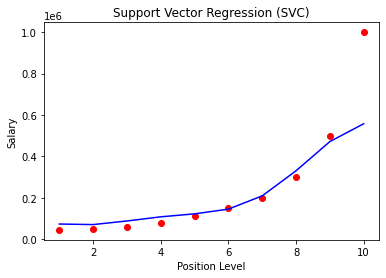

In [22]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red') #want to plot the original vectors NOT scaled vectors; y:real salaries
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color = 'blue')
plt.title('Support Vector Regression (SVC)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

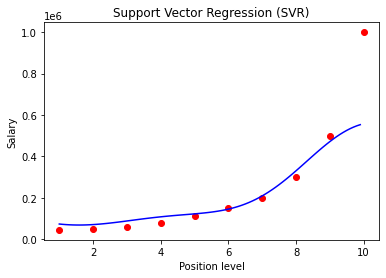

In [23]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('Support Vector Regression (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()